# Figure 3 a-d

In [2]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")

Warning message:
“NAs introduced by coercion”


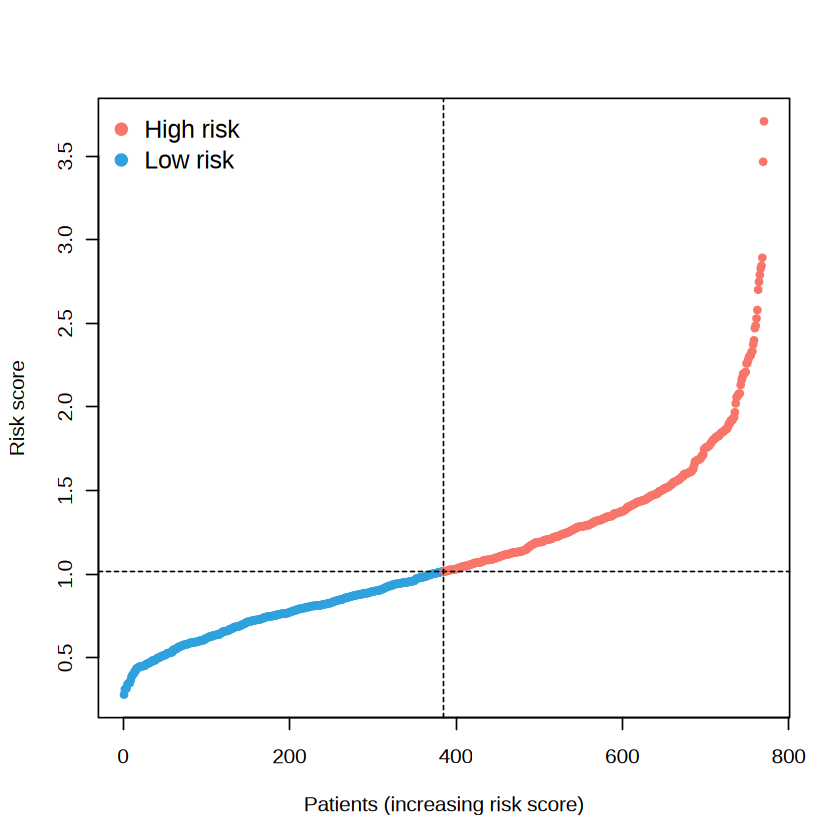

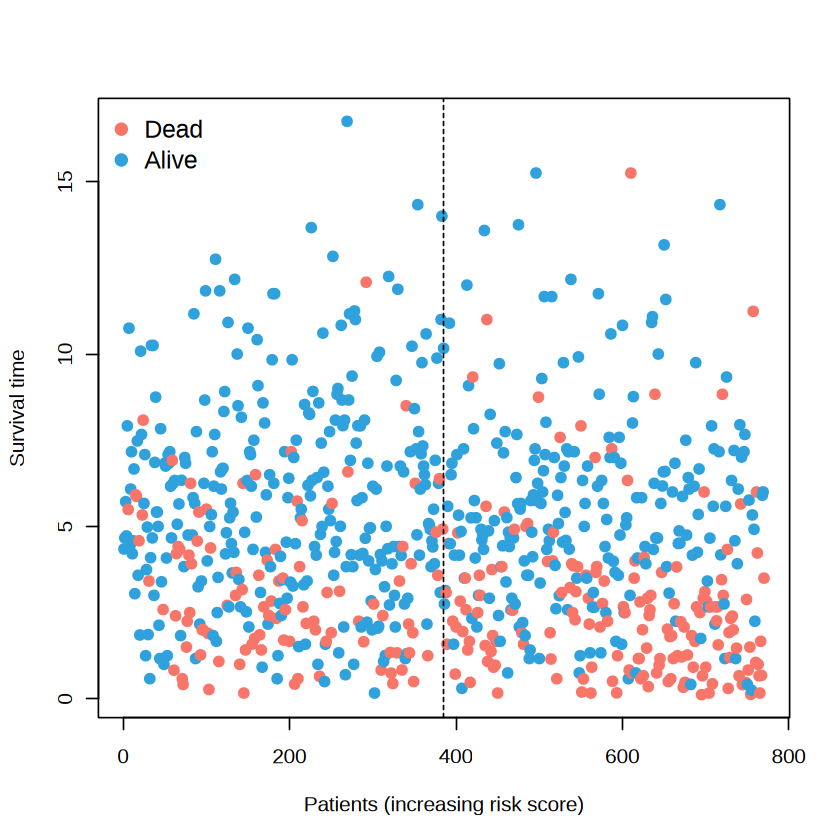

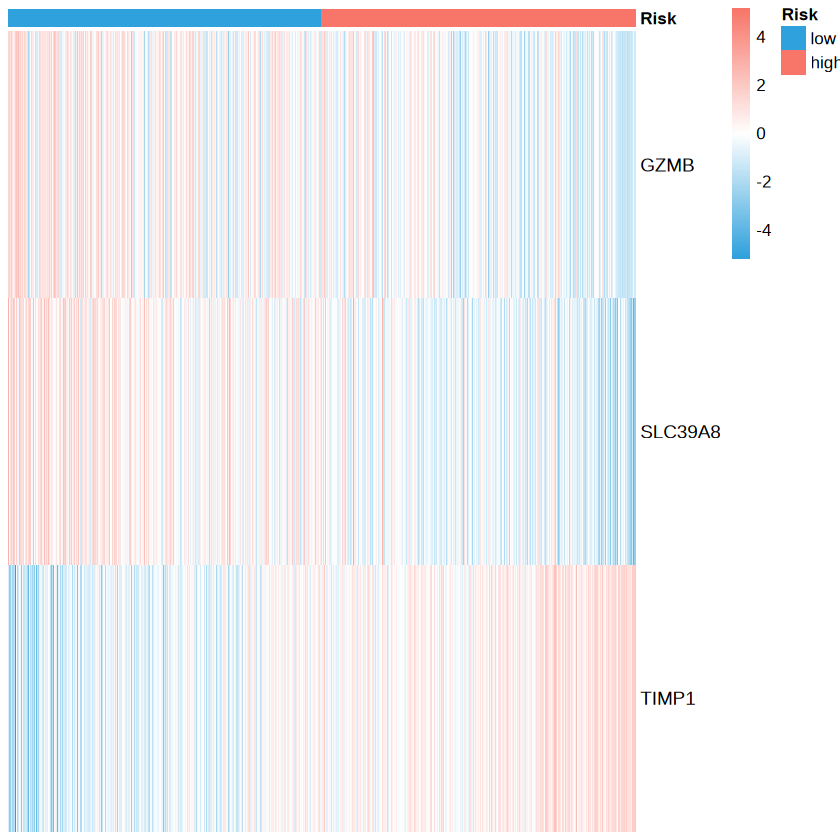

In [ ]:
# entire

## ===============================================================
## Load required libraries
## ===============================================================
library(ggplot2)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(survival)
library(survminer)

## ===============================================================
## Prepare data
## ===============================================================
# Ensure correct types
entire_risk$Status <- as.numeric(entire_risk$Status)
entire_risk$OS_time <- as.numeric(entire_risk$OS_time)
entire_risk$Age <- as.numeric(entire_risk$Age)
entire_risk$Clinical_stage <- as.numeric(entire_risk$Clinical_stage)
entire_risk$Gender <- factor(entire_risk$Gender, levels=c("Male","Female"))

# Sort by riskScore
rt <- entire_risk[order(entire_risk$riskScore), ]

# ==========================
# Define high/low risk group based on median
# ==========================
median_score <- median(rt$riskScore, na.rm = TRUE)
rt$risk_group <- ifelse(rt$riskScore > median_score, "high", "low")
rt$risk_group <- factor(rt$risk_group, levels = c("low", "high"))

## ===============================================================
## 1. Risk Ranking + Survival Scatter Plot
## ===============================================================
lowLength <- sum(rt$risk_group=="low")
highLength <- sum(rt$risk_group=="high")
line <- rt$riskScore
line[line>10] <- 10  # Cap for visualization

# Risk ranking plot
plot(line, type="p", pch=20,
     xlab="Patients (increasing risk score)", ylab="Risk score",
     col=c(rep("#2fa1dd", lowLength), rep("#f87669", highLength)))
abline(h=median_score, v=lowLength, lty=2)
legend("topleft", c("High risk", "Low risk"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)

# Survival scatter plot
color <- ifelse(rt$Status==1, "#f87669", "#2fa1dd")
plot(rt$OS_time, pch=19,
     xlab="Patients (increasing risk score)", ylab="Survival time",
     col=color)
legend("topleft", c("Dead","Alive"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)
abline(v=lowLength, lty=2)

## ===============================================================
## 2. Model Gene Expression Heatmap (GZMB, SLC39A8, TIMP1) with Risk Group Annotation
## ===============================================================
heatmap_genes <- c("GZMB","SLC39A8","TIMP1")
heatmap_genes <- heatmap_genes[heatmap_genes %in% colnames(rt)]
rt1 <- log2(rt[, heatmap_genes] + 1)
rt1 <- t(rt1)  # genes as rows, samples as columns

# Column annotation for high/low risk group
annotation_col <- data.frame(Risk = rt$risk_group)
rownames(annotation_col) <- rownames(rt) 

# Annotation colors
ann_colors <- list(Risk = c(low = "#2fa1dd", high = "#f87669"))

# Draw heatmap
pheatmap(rt1,
         annotation_col = annotation_col,
         annotation_colors = ann_colors,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         fontsize_row = 11,
         show_colnames = FALSE,
         fontsize_col = 3,
         scale = "row",
         color = colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)


Warning message:
“NAs introduced by coercion”


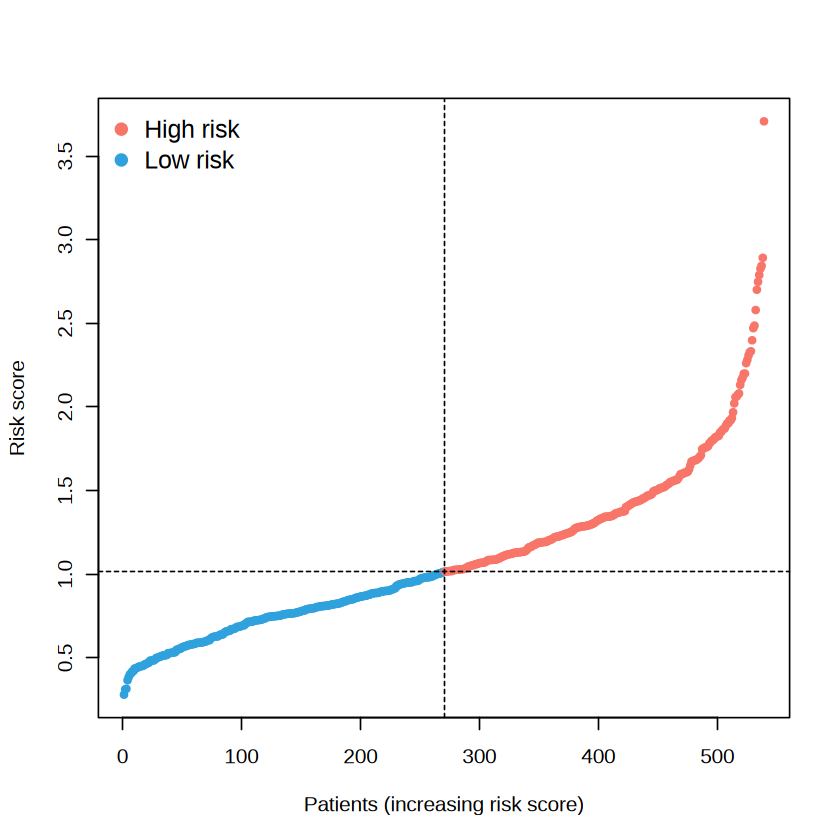

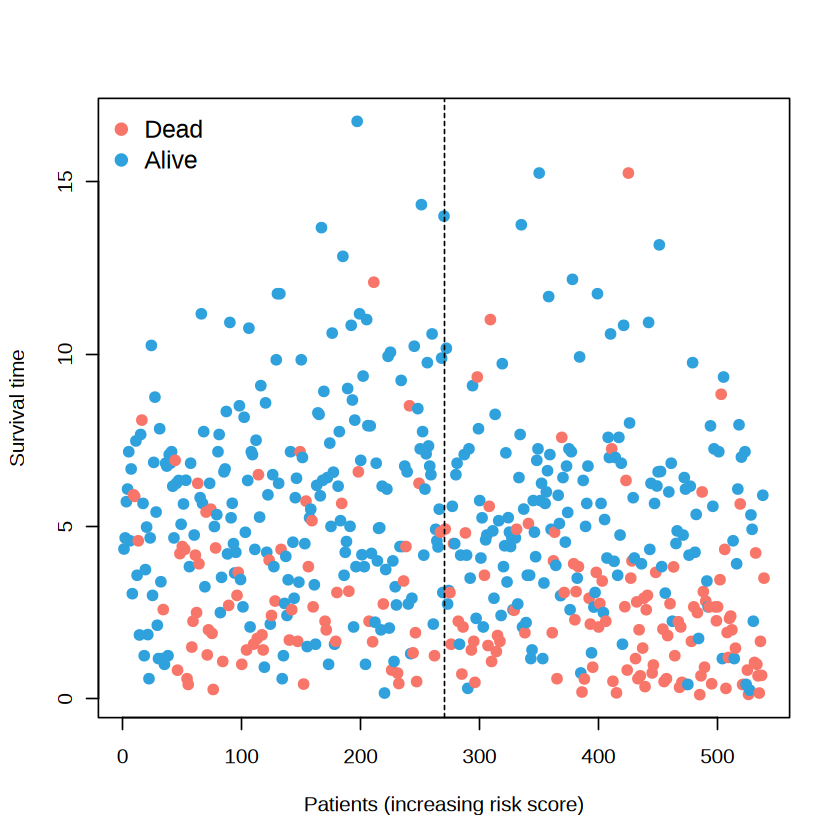

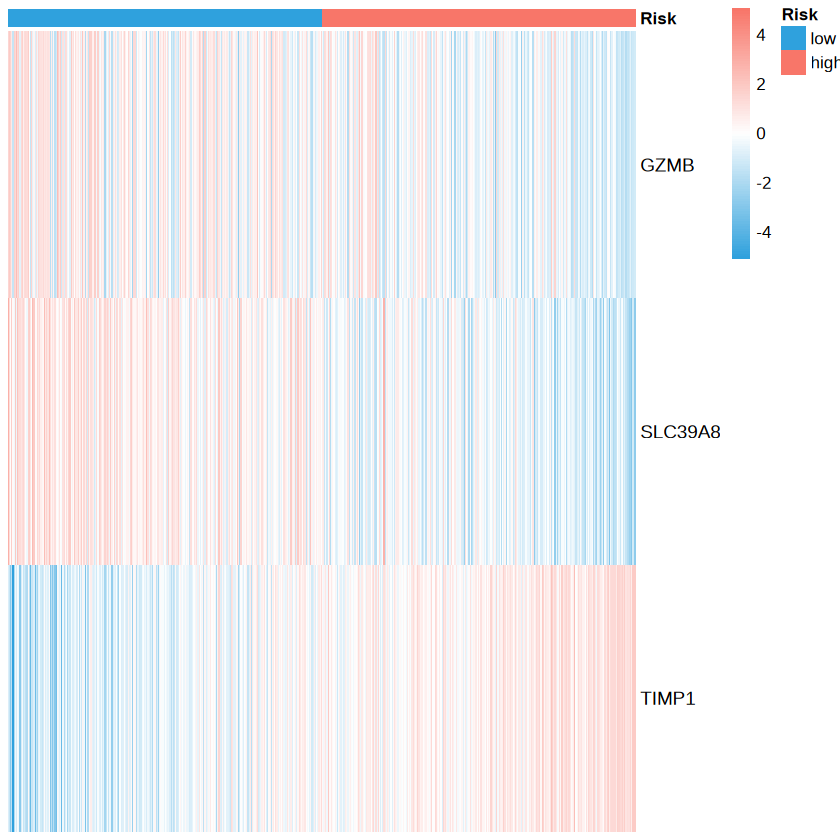

In [ ]:
# train

## ===============================================================
## Load required libraries
## ===============================================================
library(ggplot2)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(survival)
library(survminer)

## ===============================================================
## Prepare data
## ===============================================================
# Ensure correct types
train_risk$Status <- as.numeric(train_risk$Status)
train_risk$OS_time <- as.numeric(train_risk$OS_time)
train_risk$Age <- as.numeric(train_risk$Age)
train_risk$Clinical_stage <- as.numeric(train_risk$Clinical_stage)
train_risk$Gender <- factor(train_risk$Gender, levels=c("Male","Female"))

# Sort by riskScore
rt <- train_risk[order(train_risk$riskScore), ]

# ==========================
# Define high/low risk group based on median
# ==========================
median_score <- median(rt$riskScore, na.rm = TRUE)
rt$risk_group <- ifelse(rt$riskScore > median_score, "high", "low")
rt$risk_group <- factor(rt$risk_group, levels = c("low", "high"))

## ===============================================================
## 1. Risk Ranking + Survival Scatter Plot
## ===============================================================
lowLength <- sum(rt$risk_group=="low")
highLength <- sum(rt$risk_group=="high")
line <- rt$riskScore
line[line>10] <- 10  # Cap for visualization

# Risk ranking plot
plot(line, type="p", pch=20,
     xlab="Patients (increasing risk score)", ylab="Risk score",
     col=c(rep("#2fa1dd", lowLength), rep("#f87669", highLength)))
abline(h=median_score, v=lowLength, lty=2)
legend("topleft", c("High risk", "Low risk"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)

# Survival scatter plot
color <- ifelse(rt$Status==1, "#f87669", "#2fa1dd")
plot(rt$OS_time, pch=19,
     xlab="Patients (increasing risk score)", ylab="Survival time",
     col=color)
legend("topleft", c("Dead","Alive"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)
abline(v=lowLength, lty=2)

## ===============================================================
## 2. Model Gene Expression Heatmap (GZMB, SLC39A8, TIMP1) with Risk Group Annotation
## ===============================================================
heatmap_genes <- c("GZMB","SLC39A8","TIMP1")
heatmap_genes <- heatmap_genes[heatmap_genes %in% colnames(rt)]
rt1 <- log2(rt[, heatmap_genes] + 1)
rt1 <- t(rt1)  # genes as rows, samples as columns

# Column annotation for high/low risk group
annotation_col <- data.frame(Risk = rt$risk_group)
rownames(annotation_col) <- rownames(rt) 

# Annotation colors
ann_colors <- list(Risk = c(low = "#2fa1dd", high = "#f87669"))

# Draw heatmap
pheatmap(rt1,
         annotation_col = annotation_col,
         annotation_colors = ann_colors,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         fontsize_row = 11,
         show_colnames = FALSE,
         fontsize_col = 3,
         scale = "row",
         color = colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)


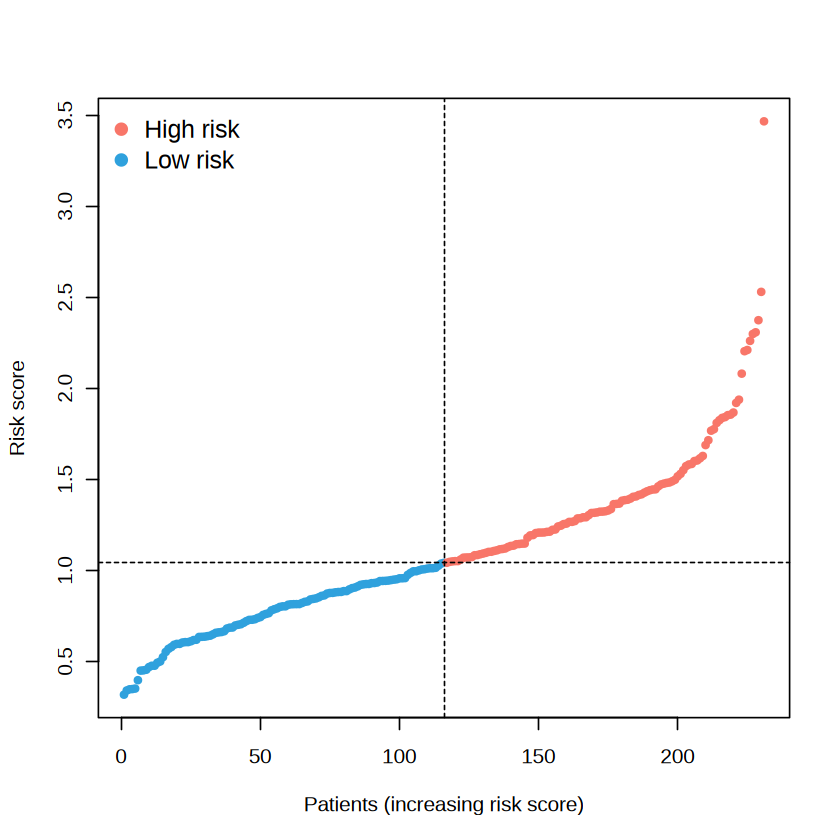

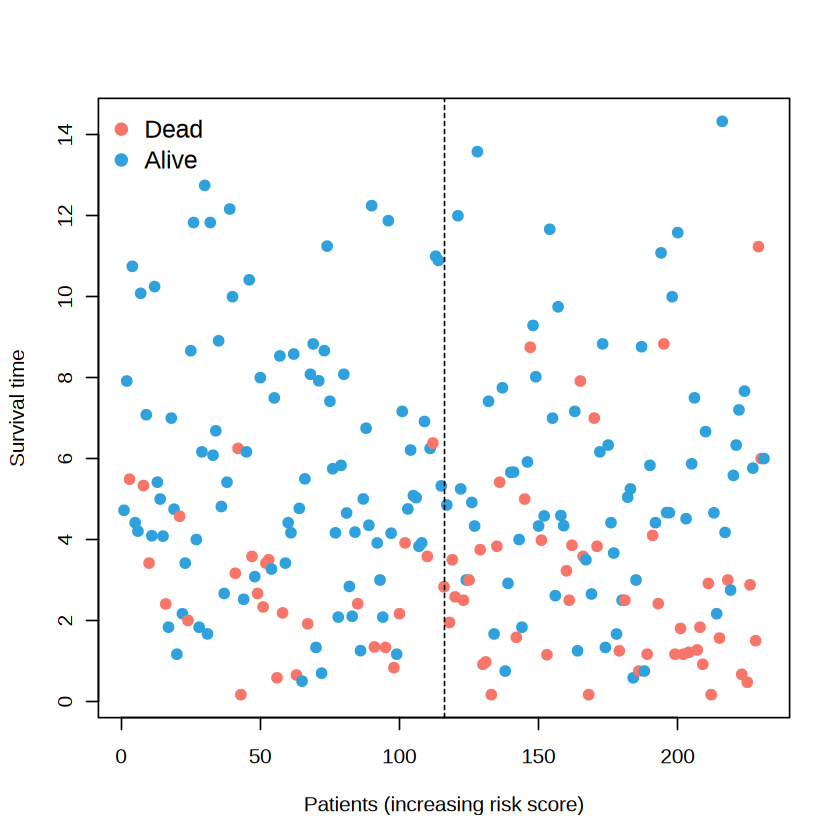

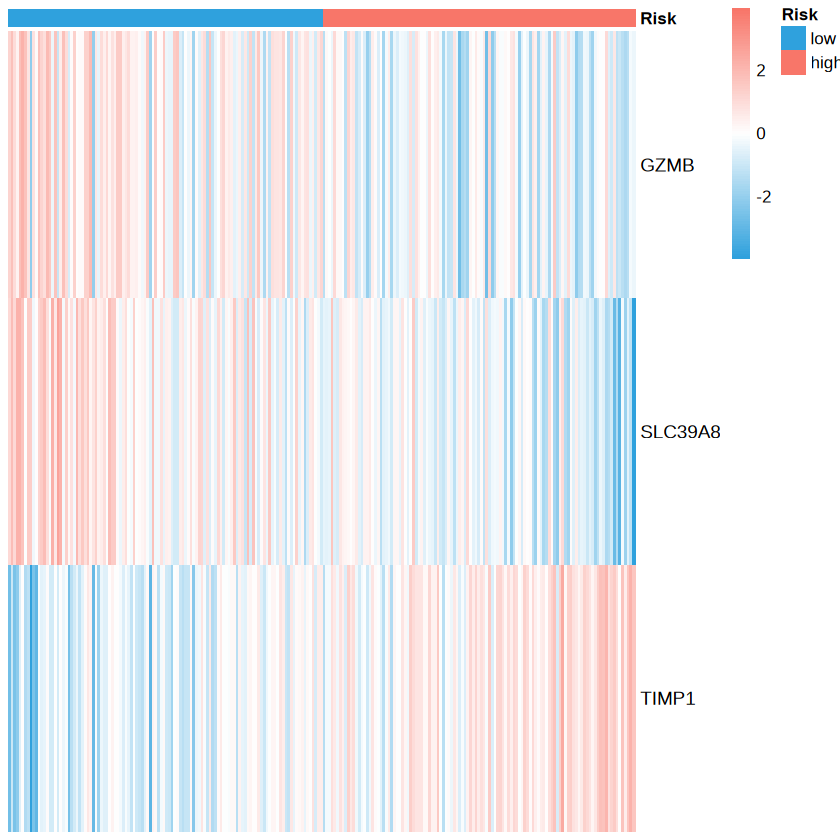

In [ ]:
# test

## ===============================================================
## Load required libraries
## ===============================================================
library(ggplot2)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(survival)
library(survminer)

## ===============================================================
## Prepare data
## ===============================================================
# Ensure correct types
test_risk$Status <- as.numeric(test_risk$Status)
test_risk$OS_time <- as.numeric(test_risk$OS_time)
test_risk$Age <- as.numeric(test_risk$Age)
test_risk$Clinical_stage <- as.numeric(test_risk$Clinical_stage)
test_risk$Gender <- factor(test_risk$Gender, levels=c("Male","Female"))

# Sort by riskScore
rt <- test_risk[order(test_risk$riskScore), ]

# ==========================
# Define high/low risk group based on median
# ==========================
median_score <- median(rt$riskScore, na.rm = TRUE)
rt$risk_group <- ifelse(rt$riskScore > median_score, "high", "low")
rt$risk_group <- factor(rt$risk_group, levels = c("low", "high"))

## ===============================================================
## 1. Risk Ranking + Survival Scatter Plot
## ===============================================================
lowLength <- sum(rt$risk_group=="low")
highLength <- sum(rt$risk_group=="high")
line <- rt$riskScore
line[line>10] <- 10  # Cap for visualization

# Risk ranking plot
plot(line, type="p", pch=20,
     xlab="Patients (increasing risk score)", ylab="Risk score",
     col=c(rep("#2fa1dd", lowLength), rep("#f87669", highLength)))
abline(h=median_score, v=lowLength, lty=2)
legend("topleft", c("High risk", "Low risk"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)

# Survival scatter plot
color <- ifelse(rt$Status==1, "#f87669", "#2fa1dd")
plot(rt$OS_time, pch=19,
     xlab="Patients (increasing risk score)", ylab="Survival time",
     col=color)
legend("topleft", c("Dead","Alive"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)
abline(v=lowLength, lty=2)

## ===============================================================
## 2. Model Gene Expression Heatmap (GZMB, SLC39A8, TIMP1) with Risk Group Annotation
## ===============================================================
heatmap_genes <- c("GZMB","SLC39A8","TIMP1")
heatmap_genes <- heatmap_genes[heatmap_genes %in% colnames(rt)]
rt1 <- log2(rt[, heatmap_genes] + 1)
rt1 <- t(rt1)  # genes as rows, samples as columns

# Column annotation for high/low risk group
annotation_col <- data.frame(Risk = rt$risk_group)
rownames(annotation_col) <- rownames(rt) 

# Annotation colors
ann_colors <- list(Risk = c(low = "#2fa1dd", high = "#f87669"))

# Draw heatmap
pheatmap(rt1,
         annotation_col = annotation_col,
         annotation_colors = ann_colors,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         fontsize_row = 11,
         show_colnames = FALSE,
         fontsize_col = 3,
         scale = "row",
         color = colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)


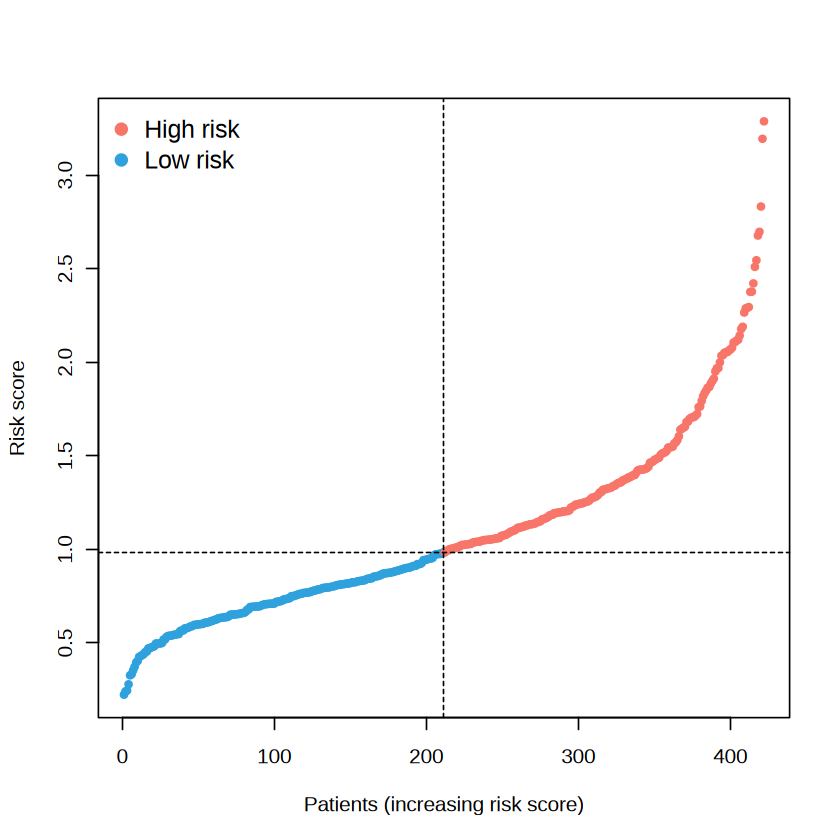

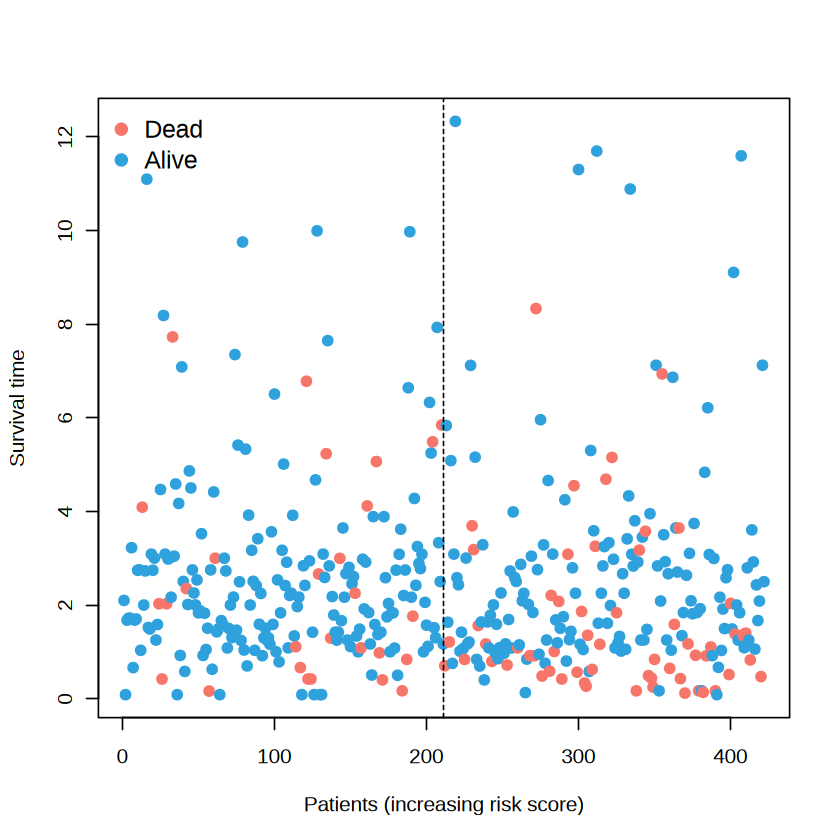

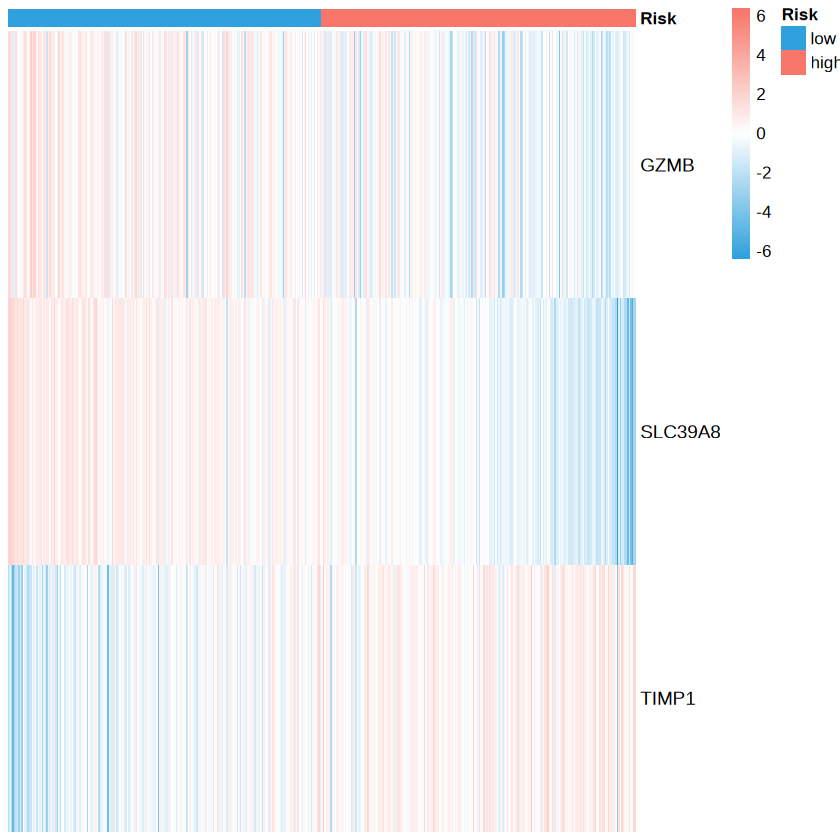

In [ ]:
# Validation

## ===============================================================
## Load required libraries
## ===============================================================
library(ggplot2)
library(ggpubr)
library(pheatmap)
library(RColorBrewer)
library(survival)
library(survminer)

## ===============================================================
## Prepare data
## ===============================================================
# Ensure correct types
TCGA_risk$Status <- as.numeric(TCGA_risk$Status)
TCGA_risk$OS_time <- as.numeric(TCGA_risk$OS_time)
TCGA_risk$Age <- as.numeric(TCGA_risk$Age)
TCGA_risk$Clinical_stage <- as.numeric(TCGA_risk$Clinical_stage)
TCGA_risk$Gender <- factor(TCGA_risk$Gender, levels=c("Male","Female"))

# Sort by riskScore
rt <- TCGA_risk[order(TCGA_risk$riskScore), ]

# ==========================
# Define high/low risk group based on median
# ==========================
median_score <- median(rt$riskScore, na.rm = TRUE)
rt$risk_group <- ifelse(rt$riskScore > median_score, "high", "low")
rt$risk_group <- factor(rt$risk_group, levels = c("low", "high"))

## ===============================================================
## 1. Risk Ranking + Survival Scatter Plot
## ===============================================================
lowLength <- sum(rt$risk_group=="low")
highLength <- sum(rt$risk_group=="high")
line <- rt$riskScore
line[line>10] <- 10  # Cap for visualization

# Risk ranking plot
plot(line, type="p", pch=20,
     xlab="Patients (increasing risk score)", ylab="Risk score",
     col=c(rep("#2fa1dd", lowLength), rep("#f87669", highLength)))
abline(h=median_score, v=lowLength, lty=2)
legend("topleft", c("High risk", "Low risk"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)

# Survival scatter plot
color <- ifelse(rt$Status==1, "#f87669", "#2fa1dd")
plot(rt$OS_time, pch=19,
     xlab="Patients (increasing risk score)", ylab="Survival time",
     col=color)
legend("topleft", c("Dead","Alive"), bty="n", pch=19,
       col=c("#f87669","#2fa1dd"), cex=1.2)
abline(v=lowLength, lty=2)

## ===============================================================
## 2. Model Gene Expression Heatmap (GZMB, SLC39A8, TIMP1) with Risk Group Annotation
## ===============================================================
heatmap_genes <- c("GZMB","SLC39A8","TIMP1")
heatmap_genes <- heatmap_genes[heatmap_genes %in% colnames(rt)]
rt1 <- log2(rt[, heatmap_genes] + 1)
rt1 <- t(rt1)  # genes as rows, samples as columns

# Column annotation for high/low risk group
annotation_col <- data.frame(Risk = rt$risk_group)
rownames(annotation_col) <- rownames(rt) 

# Annotation colors
ann_colors <- list(Risk = c(low = "#2fa1dd", high = "#f87669"))

# Draw heatmap
pheatmap(rt1,
         annotation_col = annotation_col,
         annotation_colors = ann_colors,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         fontsize_row = 11,
         show_colnames = FALSE,
         fontsize_col = 3,
         scale = "row",
         color = colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)


# Figure 3 e-h

======================================

In [7]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/TCGA_GSE39582/nomo图/cox_model.rdata")

Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




Call:
coxph(formula = Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + 
    riskScore + risk, data = risk)

  n= 422, number of events= 87 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)    
Age               0.026002   1.026343   0.009686  2.684  0.00727 ** 
Gendermale        0.039469   1.040258   0.221739  0.178  0.85872    
Clinical_stage2   0.897988   2.454659   0.616936  1.456  0.14551    
Clinical_stage3   1.644650   5.179196   0.612618  2.685  0.00726 ** 
Clinical_stage4   2.655038  14.225525   0.614723  4.319 1.57e-05 ***
riskScore         5.562147 260.381239   6.926172  0.803  0.42194    
risklow          -0.165734   0.847271   0.354105 -0.468  0.63976    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
Age                1.0263   0.974333 1.0070414 1.046e+00
Gendermale         1.0403   0.961300 0.6735916 1.607e+00
Clinical_stage2    2.4547   0.407389 0.7325782 8.225e+00
Clin

Warning message in datadist(risk):
“ICAM4 is constant”
Warning message in datadist(risk):
“CIDEB is constant”
Warning message in datadist(risk):
“NPFF is constant”
Warning message in datadist(risk):
“ZNF593 is constant”
Warning message in datadist(risk):
“EVA1B is constant”
Warning message in datadist(risk):
“ADIRF is constant”
Warning message in datadist(risk):
“PGAM2 is constant”
Warning message in datadist(risk):
“C19orf33 is constant”
Warning message in datadist(risk):
“SFT2D3 is constant”
Warning message in datadist(risk):
“RNASE11 is constant”
Warning message in datadist(risk):
“HYI is constant”
Warning message in datadist(risk):
“CMC4 is constant”
Warning message in datadist(risk):
“ABHD16B is constant”
Warning message in datadist(risk):
“BOLA2 is constant”
Warning message in datadist(risk):
“PMCH is constant”
Warning message in datadist(risk):
“BPY2 is constant”
Warning message in datadist(risk):
“NPB is constant”
Warning message in datadist(risk):
“MIRLET7D is constant”
Warnin

agg_record_514072915 
                   2

Regression  cox_cph cph formula:

Surv(OS_time, Status) `~` Age + Gender + Clinical_stage + risk



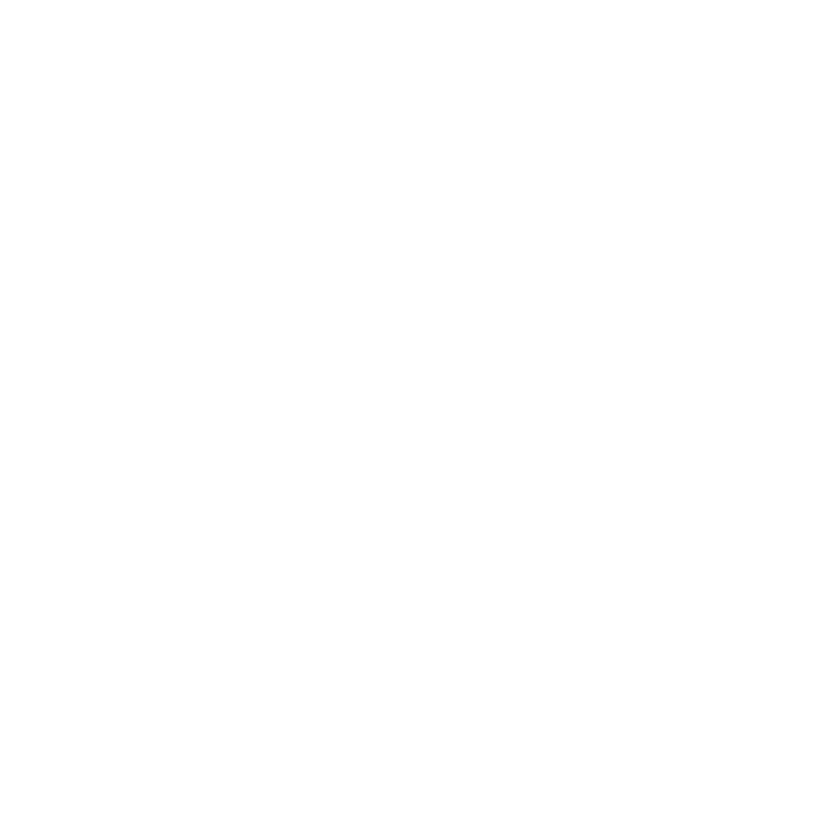

CI: 0.155(0.0981,0.239)

CI: 0.333(0.22,0.482)

CI: 0.508(0.353,0.684)



,risk,Points
,<chr>,<chr>
risk2,low,16
risk1,high,26
,Clinical_stage,Points
,<chr>,<chr>
Clinical_stage1,1,26
Clinical_stage2,2,51
Clinical_stage3,3,72
Clinical_stage4,4,100
,Gender,Points


null device 
          1

Regression  cox_cph cph formula:

Surv(OS_time, Status) `~` Age + Gender + Clinical_stage + risk



,risk,Points
,<chr>,<chr>
risk2,low,16
risk1,high,26
,Clinical_stage,Points
,<chr>,<chr>
Clinical_stage1,1,26
Clinical_stage2,2,51
Clinical_stage3,3,72
Clinical_stage4,4,100
,Gender,Points


null device 
          1

Using Cox survival estimates at  1 Days


Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in fitter(X, Y, strata = Strata, offset = offset, weights = weights, :
“Loglik converged before variable  2,3,4 ; coefficient may be infinite. ”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”


Using Cox survival estimates at  3 Days


Warning message in fitter(X, Y, strata = Strata, offset = offset, weights = weights, :
“Loglik converged before variable  3,4 ; coefficient may be infinite. ”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”
Warning message in groupkm(cox, Surv(y[, 1], y[, 2]), u = u, cuts = orig.cuts):
“one interval had < 2 observations”


Using Cox survival estimates at  5 Days


Warning message in fitter(X, Y, strata = Strata, offset = offset, weights = weights, :
“Loglik converged before variable  3 ; coefficient may be infinite. ”


png 
  2

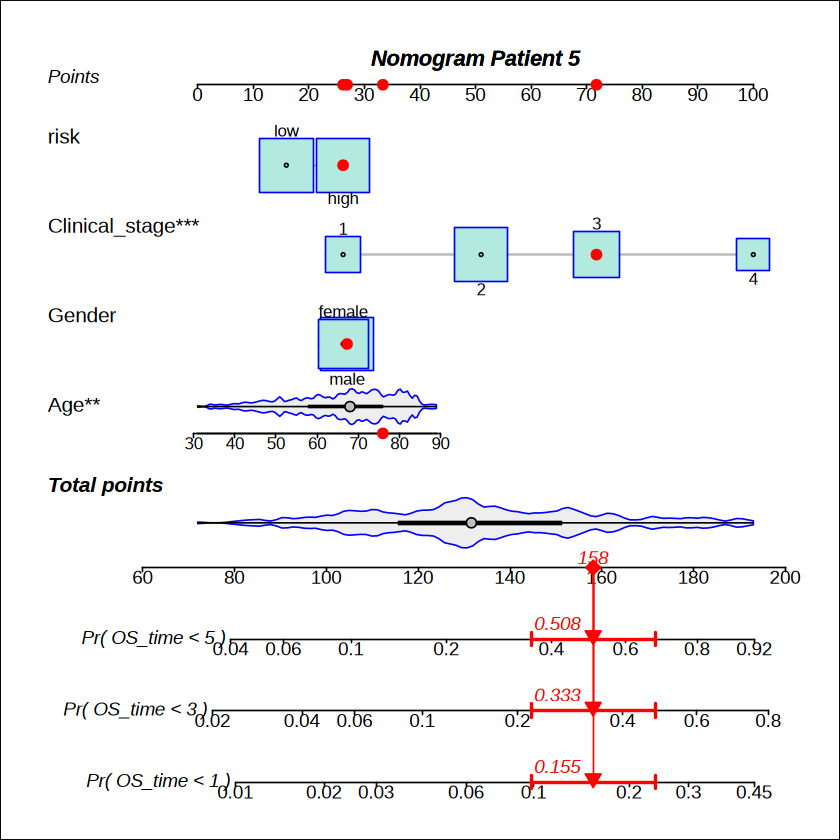

In [8]:
# ==========================================
# 1. Load libraries
# ==========================================
library(survival)
library(rms)
library(ggplot2)
library(regplot)
library(survminer)
library(grid)

# ==========================================
# 2. Data preparation
# ==========================================
# train_pd_exp_;tset_pd_exp_;train_pd_exp;tset_pd_exp;entire;external
pd_exp <- TCGA_exp_pd_  # Load your expression dataset

riskScore <- predict(cox_gene, type="risk", newdata=pd_exp)
risk <- data.frame(pd_exp,
                   riskScore = riskScore,
                   risk = ifelse(riskScore > median(riskScore), "high", "low"))

# Convert variables
risk$Age <- as.numeric(risk$Age)
risk$Clinical_stage <- as.factor(risk$Clinical_stage)
risk$Gender <- factor(tolower(as.character(risk$Gender)))
risk$risk <- as.factor(risk$risk)

# ==========================================
# 3. Multivariate Cox regression
# ==========================================
multiCox <- coxph(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + riskScore + risk,
                  data = risk)
summary(multiCox)

# ==========================================
# 4. Forest plot
# ==========================================
forest_plot <- ggforest(multiCox,
                        data = risk,
                        main = 'Hazard Ratio of Multivariate Cox',
                        cpositions = c(0.05, 0.15, 0.35),
                        fontsize = 0.8,
                        refLabel = 'reference',
                        noDigits = 3)
# Save forest plot
ggsave("forest_plot.png", plot = forest_plot, width = 10, height = 8, dpi = 300)

# ==========================================
# 5. Nomogram
# ==========================================
dd <- datadist(risk)
options(datadist = "dd")

psm_model <- psm(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + riskScore,
                 data = risk, dist = 'lognormal')
surv_fun <- Survival(psm_model)

nom <- nomogram(psm_model,
                fun = list(
                  function(x) surv_fun(365, x),
                  function(x) surv_fun(1095, x),
                  function(x) surv_fun(1825, x)
                ),
                funlabel = c("1-year OS", "3-year OS", "5-year OS"))

# Save nomogram
png("nomogram.png", width = 1200, height = 800, res = 150)
plot(nom, xfrac = 0.2)
dev.off()

# ==========================================
# 6. Individualized regplot
# ==========================================
cox_cph <- cph(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + risk,
               data = risk, x = TRUE, y = TRUE)

# Example: patient 5
png("regplot_patient5.png", width = 1000, height = 1000, res = 150)
regplot(cox_cph,
        observation = risk[5,],
        interval = "confidence",
        title = "Nomogram Patient 5",
        plots = c("violin", "boxes"),
        failtime = c(1,3,5),
        points = TRUE,
        clickable = FALSE)
dev.off()

# Example: patient 1
png("regplot_patient1.png", width = 1000, height = 1000, res = 150)
regplot(cox_cph,
        observation = risk[1,],
        obscol = "#326db1",
        failtime = c(1,3,5),
        plots = c("bars","boxes"),
        droplines = TRUE,
        points = TRUE,
        title = "Nomogram Patient 1",
        showP = TRUE,
        rank = "sd",
        clickable = FALSE,
        prfail = TRUE)
dev.off()

# ==========================================
# 7. Calibration curves (1,3,5 years)
# ==========================================
# Function to create ggplot-compatible calibration curve
calibrate_cox <- function(cox_model, u, m=100, B=1000){
  cal <- calibrate(cox_model, cmethod="KM", method="boot", u=u, m=m, B=B)
  return(cal)
}

cox1 <- cph(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + risk,
            surv = TRUE, x = TRUE, y = TRUE, time.inc = 1, data = risk)
cox3 <- cph(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + risk,
            surv = TRUE, x = TRUE, y = TRUE, time.inc = 3, data = risk)
cox5 <- cph(Surv(OS_time, Status) ~ Age + Gender + Clinical_stage + risk,
            surv = TRUE, x = TRUE, y = TRUE, time.inc = 5, data = risk)

cal1 <- calibrate_cox(cox1, u=1)
cal3 <- calibrate_cox(cox3, u=3)
cal5 <- calibrate_cox(cox5, u=5)

# Save calibration curves
png("calibration_curves.png", width = 1200, height = 800, res = 150)
plot(cal1, lwd=2, lty=1, errbar.col="black",
     xlab ="Predicted 1-,3-,5-Year Survival Probability",
     ylab="Observed Survival Probability",
     col="blue", sub=FALSE)
plot(cal3, add=TRUE, lwd=2, lty=1, errbar.col="black", col="red", sub=FALSE)
plot(cal5, add=TRUE, lwd=2, lty=1, errbar.col="black", col="green", sub=FALSE)
legend("bottomright", legend=c("1-year","3-year","5-year"),
       col=c("blue","red","green"), lwd=2)
dev.off()
